In [1]:
import numpy as np
import os
import datetime as datetime
import pandas as pd


os.system('source /home/jackalak/heartbeat/cdf38_0-dist/bin/definitions.B')
os.environ["CDF_LIB"] = '/home/jackalak/heartbeat/cdf38_0-dist/lib'
from spacepy import pycdf
from nasaomnireader import omnireader

import matplotlib.pyplot as plt


import numpy as np
import pandas as pd
from datetime import timedelta


import ftplib
import os


import numpy as np
import os
import datetime as datetime
import pandas as pd





import pickle
import glob



import tensorflow as tf
from tensorflow import keras
tf.keras.backend.set_floatx(
    'float32'
)

import datetime

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
import tensorflow

import numpy as np
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout
from sklearn import preprocessing


from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import datetime
from os.path import isfile, join
from sys import getsizeof
import glob

from random import *

import matplotlib.pyplot as plt
%matplotlib notebook

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.layers import Input

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/nasaomnireader-0.1.0-py3.6.egg/nasaomnireader/__init__.py", line 5, in <module>
    from nasaomnireader.omnireader_config import config
ModuleNotFoundError: No module named 'nasaomnireader.omnireader_config'

Solar wind data files will be saved to /home/jackalak/.local/share/nasaomnireader


In [2]:

#https://github.com/tensorflow/tensorflow/issues/956
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import InputSpec 
from tensorflow.python.keras.utils import conv_utils

class PeriodicPadding2D(layers.Layer):

  def __init__(self, padding=1, **kwargs):
    super(PeriodicPadding2D, self).__init__(**kwargs)
    self.padding = conv_utils.normalize_tuple(padding, 1, 'padding')
    self.input_spec = InputSpec(ndim=4)

  def wrap_pad(self, input, size):
    M1 = tf.concat([input[:,:, -size:], input, input[:,:, 0:size]], 2)
    M1 = tf.concat([M1[:,0:size, :], M1, M1[:,0:size, :]], 1) #not periodic
    return M1

  def compute_output_shape(self, input_shape):
    shape = list(input_shape)
    assert len(shape) == 3  
    if shape[1] is not None:
      length = shape[1] + 2*self.padding[0]
    else:
      length = None
    return tuple([shape[0], length, length])

  def call(self, inputs): 
    return self.wrap_pad(inputs, self.padding[0])

  def get_config(self):
    config = {'padding': self.padding}
    base_config = super(PeriodicPadding2D, self).get_config()
    return dict(list(base_config.items()) + list(config.items()))


In [3]:
def plot_model(df_results, test):
    
    subdir = 'figures2/energyflux/'

    y_val_log = np.log10(test['ELE_TOTAL_ENERGY_FLUX'])
    
    plt.figure()
    plt.title('Electron Total Energy Flux, log10 scale')    
    plt.plot(y_val_log[:],alpha=0.5)
    plt.plot(df_results[:],alpha=0.5)
    plt.legend(['val', 'result'], loc='upper left')
    plt.ylabel('log10 eV/cm^2/ster/s')
    plt.show()
    plt.savefig(subdir+'1',dpi=dpi)
    
    plt.figure()
    plt.title('Electron Total Energy Flux')   
    plt.plot(10**y_val_log[:]*1.6e-6,alpha=0.5)
    plt.plot(10**df_results[:]*1.6e-6,alpha=0.5)
    plt.legend(['val', 'result'], loc='upper left')
    plt.ylabel('erg/cm^2/ster/s')
    plt.show()
    plt.savefig(subdir+'2',dpi=dpi)
    start=int(y_val_log.shape[0]/2)
    plt.figure()
    plt.title('Electron Total Energy Flux, log10 scale')   
    plt.plot(y_val_log[start:2000+start],alpha=0.5)
    plt.plot(df_results[start:2000+start],alpha=0.5)
    plt.legend(['val', 'result'], loc='upper left')
    plt.ylabel('log10 eV/cm^2/ster/s')
    plt.show()
    plt.savefig(subdir+'3',dpi=dpi)
    plt.figure()
    plt.title('Electron Total Energy Flux')   
    plt.plot(10**y_val_log[start:2000+start]*1.6e-6,alpha=0.5)
    plt.plot(10**df_results[start:2000+start]*1.6e-6,alpha=0.5)
    plt.legend(['val', 'result'], loc='upper left')
    plt.ylabel('erg/cm^2/ster/s')
    plt.show()
    plt.savefig(subdir+'4',dpi=dpi)
    

    minr = np.min(y_val_log.values)
    maxr = np.max(y_val_log.values)
    plt.figure()
    plt.title('Histogram of Electron Total Energy Flux, log10 scale')   
    plt.hist(y_val_log.values,bins=200,alpha=0.5,range=(minr,maxr))
    plt.hist(df_results.values,bins=200,alpha=0.5,range=(minr,maxr))
    plt.legend(['val','result'], loc='upper left')
    plt.ylabel('#/bin')
    plt.xlabel('log10 eV/cm^2/ster/s')
    plt.show()
    plt.savefig(subdir+'5',dpi=dpi)
    plt.figure()
    plt.title('Histogram of Electron Total Energy Flux')   
    plt.hist(10**y_val_log.values*1.6e-6,bins=100, log=True,range=(10**minr*1.6e-6,10**maxr*1.6e-6),alpha=0.5)
    plt.hist(10**df_results.values*1.6e-6,bins=100, log=True,range=(10**minr*1.6e-6,10**maxr*1.6e-6),alpha=0.5)
    plt.legend(['val', 'result'], loc='upper left')
    plt.ylabel('#/bin')
    plt.xlabel('erg/cm^2/ster/s')
    plt.show()
    plt.savefig(subdir+'6',dpi=dpi)
    import matplotlib.colors as mcolors
    gamma = 0.2#[0.8, 0.5, 0.3]

    errors= y_val_log.values-df_results.values[:,0]
    plt.figure();
    plt.hist2d(test['SC_AACGM_LAT'].values, errors,
                  bins=50, norm=mcolors.PowerNorm(gamma))
    plt.title('Error density over SC_AACGM_LAT Bins')
    plt.xlabel('SC_AACGM_LAT degrees')
    plt.ylabel('log10(y_true)-log10(y_pred) eV/cm^2/ster/s')
    plt.show()
    plt.savefig(subdir+'7',dpi=dpi)
    plt.figure()
    bin_total = np.zeros((200))
    bin_error_total = np.zeros((200))
    for j in range(0,y_val_log.values.shape[0]):
        i = int((test['SC_AACGM_LAT'].values[j]-45)/((90-45)/200))
        if i < 200:
            bin_total[i] = bin_total[i]+1
            bin_error_total[i] = bin_error_total[i] + np.abs(errors[j])

    avg_error_over_hist = bin_error_total/bin_total
    plt.scatter(np.linspace(45,90,num=200),avg_error_over_hist)
    plt.title('Average Validation Error over SC_AACGM_LAT Bins')
    plt.xlabel('SC_AACGM_LAT degrees')
    plt.ylabel('log10(y_true)-log10(y_pred) eV/cm^2/ster/s')
    plt.show()
    plt.savefig(subdir+'8',dpi=dpi)
    bin_total = np.zeros((200))
    bin_error_total = np.zeros((200))
    for j in range(0,y_val_log.values.shape[0]):
        i = int((y_val_log[j]-minr)/((maxr-minr)/200))
        if i < 200:
            bin_total[i] = bin_total[i]+1
            bin_error_total[i] = bin_error_total[i] + np.abs(errors[j])

    avg_error_over_hist = bin_error_total/(bin_total+.00001)
    plt.figure()
    plt.scatter(np.linspace(minr,maxr,num=200),avg_error_over_hist)
    plt.title('Average Validation Error over target Bins')    
    plt.xlabel('log10(y_true) eV/cm^2/ster/s')
    plt.ylabel('log10(y_true)-log10(y_pred) eV/cm^2/ster/s')
    plt.show()
    plt.savefig(subdir+'9',dpi=dpi)
    import matplotlib.colors as mcolors
    gamma = 0.2#[0.8, 0.5, 0.3]
    errors= y_val_log.values-df_results.values[:,0]

    plt.figure();
    plt.hist2d(y_val_log.values, errors,
                  bins=50, norm=mcolors.PowerNorm(gamma))
    plt.colorbar()
    plt.title('Error Density')
    plt.xlabel('log10(y_true) eV/cm^2/ster/s')
    plt.ylabel('log10(y_true)-log10(y_pred) eV/cm^2/ster/s')
    plt.show()
    plt.savefig(subdir+'10',dpi=dpi)
    plt.figure();
    plt.hist2d(y_val_log.values, df_results.values[:,0],
                  bins=50, norm=mcolors.PowerNorm(gamma))
    plt.colorbar()
    plt.title('Error Density')
    plt.xlabel('log10(y_true) eV/cm^2/ster/s')
    plt.ylabel('log10(y_pred) eV/cm^2/ster/s')
    temp = np.array([7,8,9,10,11,12,13])
    plt.plot(temp,temp,color='k')
    plt.xlim([7,13])
    plt.ylim([7,13])
    plt.show()
    plt.savefig(subdir+'11',dpi=dpi)

In [4]:

# # LOAD THE COMBINED SOURTHERN HEMISPHERE AND NORTHERN HEMISPHERE AS CREATED ABOVE
# test = pd.DataFrame()

# for ii in [17,18,6,7,8,9,12,13,14,15,16,]:

#     filescname = "../Downloads/sc_df_cleaned_GFi_" + str(ii) + ".pkl"
#     pickle_file = open(filescname, "rb") 

#     test =pd.concat([test,pickle.load(pickle_file)] )
    
# # filescname = "./all_sc_df_1min_SH_NH_combined.pkl"
# # pickle_file = open(filescname, "rb") 
# # test =pickle.load(pickle_file)
# print(test.columns.tolist())

In [5]:

# LOAD THE COMBINED SOURTHERN HEMISPHERE AND NORTHERN HEMISPHERE AS CREATED ABOVE
df_cumulative = pd.DataFrame()
# for ii in [17,18,6,7,8,9,12,13,14,15,16,]:
#     filescname = "./sc_df_cleaned_GFi_" + str(ii) + ".pkl"
#     pickle_file = open(filescname, "rb") 
#     df_cumulative =pd.concat([df_cumulative,pickle.load(pickle_file)] )

filescname = "/home/jackalak/heartbeat/ParticlePrecipitation/ML_DB_subsamp_ext_full_dfCumulative_complexHemisphereCombine.csv"
file= open(filescname, "rb") 
df_cumulative =pd.read_csv(file)
df_cumulative = df_cumulative.set_index('Datetimes')
df_cumulative.index = pd.to_datetime(df_cumulative.index)
print(df_cumulative.columns.tolist())

df_cumulative=df_cumulative[['SC_AACGM_LAT','SC_AACGM_LTIME', 'ELE_TOTAL_ENERGY_FLUX', 'ID_SC', 'sin_ut',
                             'cos_ut', 'sin_doy', 'cos_doy', 'sin_SC_AACGM_LTIME', 'cos_SC_AACGM_LTIME',
                               'F107', 'Bz', 'By', 'Bx', 'AE', 'AL', 'AU', 'SymH', 'PC', 'vsw', 'vx', 'psw', 'borovsky', 'newell', 'F107_6hr', 'Bz_6hr', 'By_6hr', 'Bx_6hr', 'AE_6hr', 'AL_6hr', 'AU_6hr', 'SymH_6hr', 'PC_6hr', 'vsw_6hr', 'vx_6hr', 'psw_6hr', 'borovsky_6hr', 'newell_6hr', 'F107_5hr', 'Bz_5hr', 'By_5hr', 'Bx_5hr', 'AE_5hr', 'AL_5hr', 'AU_5hr', 'SymH_5hr', 'PC_5hr', 'vsw_5hr', 'vx_5hr', 'psw_5hr', 'borovsky_5hr', 'newell_5hr', 'F107_3hr', 'Bz_3hr', 'By_3hr', 'Bx_3hr', 'AE_3hr', 'AL_3hr', 'AU_3hr', 'SymH_3hr', 'PC_3hr', 'vsw_3hr', 'vx_3hr', 'psw_3hr', 'borovsky_3hr', 'newell_3hr', 'F107_1hr', 'Bz_1hr', 'By_1hr', 'Bx_1hr', 'AE_1hr', 'AL_1hr', 'AU_1hr', 'SymH_1hr', 'PC_1hr', 'vsw_1hr', 'vx_1hr', 'psw_1hr', 'borovsky_1hr', 'newell_1hr', 'F107_45min', 'Bz_45min', 'By_45min', 'Bx_45min', 'AE_45min', 'AL_45min', 'AU_45min', 'SymH_45min', 'PC_45min', 'vsw_45min', 'vx_45min', 'psw_45min', 'borovsky_45min', 'newell_45min', 'F107_30min', 'Bz_30min', 'By_30min', 'Bx_30min', 'AE_30min', 'AL_30min', 'AU_30min', 'SymH_30min', 'PC_30min', 'vsw_30min', 'vx_30min', 'psw_30min', 'borovsky_30min', 'newell_30min', 'F107_15min', 'Bz_15min', 'By_15min', 'Bx_15min', 'AE_15min', 'AL_15min', 'AU_15min', 'SymH_15min', 'PC_15min', 'vsw_15min', 'vx_15min', 'psw_15min', 'borovsky_15min', 'newell_15min', 'F107_10min', 'Bz_10min', 'By_10min', 'Bx_10min', 'AE_10min', 'AL_10min', 'AU_10min', 'SymH_10min', 'PC_10min', 'vsw_10min', 'vx_10min', 'psw_10min', 'borovsky_10min', 'newell_10min', 'F107_5min', 'Bz_5min', 'By_5min', 'Bx_5min', 'AE_5min', 'AL_5min', 'AU_5min', 'SymH_5min', 'PC_5min', 'vsw_5min', 'vx_5min', 'psw_5min', 'borovsky_5min', 'newell_5min'        ]]

df_cumulative.sort_index()
df_cumulative

# Separate training and testing data
mask_val = [(df_cumulative.index.year == 2010) & (df_cumulative['ID_SC'].values==16)]
df_val = df_cumulative[mask_val[0]].copy(deep=True)
df_train = df_cumulative.copy(deep=True).drop( df_cumulative.index[mask_val[0]])

del df_cumulative

feature_cols = [ 'ID_SC', 'sin_ut','cos_ut', 'sin_doy', 'cos_doy', 
                     'F107', 'Bz', 'By', 'Bx', 'AE', 'AL', 'AU', 'SymH', 'PC', 'vsw', 'vx', 'psw', 'borovsky', 'newell', 'F107_6hr', 'Bz_6hr', 'By_6hr', 'Bx_6hr', 'AE_6hr', 'AL_6hr', 'AU_6hr', 'SymH_6hr', 'PC_6hr', 'vsw_6hr', 'vx_6hr', 'psw_6hr', 'borovsky_6hr', 'newell_6hr', 'F107_5hr', 'Bz_5hr', 'By_5hr', 'Bx_5hr', 'AE_5hr', 'AL_5hr', 'AU_5hr', 'SymH_5hr', 'PC_5hr', 'vsw_5hr', 'vx_5hr', 'psw_5hr', 'borovsky_5hr', 'newell_5hr', 'F107_3hr', 'Bz_3hr', 'By_3hr', 'Bx_3hr', 'AE_3hr', 'AL_3hr', 'AU_3hr', 'SymH_3hr', 'PC_3hr', 'vsw_3hr', 'vx_3hr', 'psw_3hr', 'borovsky_3hr', 'newell_3hr', 'F107_1hr', 'Bz_1hr', 'By_1hr', 'Bx_1hr', 'AE_1hr', 'AL_1hr', 'AU_1hr', 'SymH_1hr', 'PC_1hr', 'vsw_1hr', 'vx_1hr', 'psw_1hr', 'borovsky_1hr', 'newell_1hr', 'F107_45min', 'Bz_45min', 'By_45min', 'Bx_45min', 'AE_45min', 'AL_45min', 'AU_45min', 'SymH_45min', 'PC_45min', 'vsw_45min', 'vx_45min', 'psw_45min', 'borovsky_45min', 'newell_45min', 'F107_30min', 'Bz_30min', 'By_30min', 'Bx_30min', 'AE_30min', 'AL_30min', 'AU_30min', 'SymH_30min', 'PC_30min', 'vsw_30min', 'vx_30min', 'psw_30min', 'borovsky_30min', 'newell_30min', 'F107_15min', 'Bz_15min', 'By_15min', 'Bx_15min', 'AE_15min', 'AL_15min', 'AU_15min', 'SymH_15min', 'PC_15min', 'vsw_15min', 'vx_15min', 'psw_15min', 'borovsky_15min', 'newell_15min', 'F107_10min', 'Bz_10min', 'By_10min', 'Bx_10min', 'AE_10min', 'AL_10min', 'AU_10min', 'SymH_10min', 'PC_10min', 'vsw_10min', 'vx_10min', 'psw_10min', 'borovsky_10min', 'newell_10min', 'F107_5min', 'Bz_5min', 'By_5min', 'Bx_5min', 'AE_5min', 'AL_5min', 'AU_5min', 'SymH_5min', 'PC_5min', 'vsw_5min', 'vx_5min', 'psw_5min', 'borovsky_5min', 'newell_5min'               ]
print(len(feature_cols))

# Construct X and y
# feature_cols = [c for c in df_train.columns if not 'ELE' in c]
# print( (feature_cols))
#print(df_cumulative.columns)
X_val = df_val[feature_cols].copy(deep=True)
y_val = df_val['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
X_train = df_train[feature_cols].copy(deep=True)
y_train = df_train['ELE_TOTAL_ENERGY_FLUX'].copy(deep=True)
scaler_X = preprocessing.RobustScaler()
scaler_X = scaler_X.fit(X_train.values)
X_val_scaled = scaler_X.transform(X_val.values)
X_train_scaled = scaler_X.transform(X_train.values)

numFeatures = len(X_train.columns.to_list())
feature_labels = X_train.columns.to_list()
y_train_erg = y_train.copy(deep=True) * (1.60218e-12)
y_val_erg = y_val.copy(deep=True) * (1.60218e-12)

y_train[y_train == 0] = 0.0001
y_val[y_val == 0] = 0.0001
y_train_log = np.log10(y_train.copy(deep=True))
y_val_log = np.log10(y_val.copy(deep=True))
XX = np.array(X_train_scaled, dtype=np.float32)
XX_test = np.array(X_val_scaled, dtype=np.float32)

del X_val, X_train

import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input

['SC_AACGM_LAT', 'SC_AACGM_LTIME', 'ELE_TOTAL_ENERGY_FLUX', 'ELE_TOTAL_ENERGY_FLUX_STD', 'ELE_AVG_ENERGY', 'ELE_AVG_ENERGY_STD', 'ID_SC', 'sin_ut', 'cos_ut', 'sin_doy', 'cos_doy', 'sin_SC_AACGM_LTIME', 'cos_SC_AACGM_LTIME', 'F107', 'Bz', 'By', 'Bx', 'AE', 'AL', 'AU', 'SymH', 'PC', 'vsw', 'vx', 'psw', 'borovsky', 'newell', 'F107_6hr', 'Bz_6hr', 'By_6hr', 'Bx_6hr', 'AE_6hr', 'AL_6hr', 'AU_6hr', 'SymH_6hr', 'PC_6hr', 'vsw_6hr', 'vx_6hr', 'psw_6hr', 'borovsky_6hr', 'newell_6hr', 'F107_5hr', 'Bz_5hr', 'By_5hr', 'Bx_5hr', 'AE_5hr', 'AL_5hr', 'AU_5hr', 'SymH_5hr', 'PC_5hr', 'vsw_5hr', 'vx_5hr', 'psw_5hr', 'borovsky_5hr', 'newell_5hr', 'F107_3hr', 'Bz_3hr', 'By_3hr', 'Bx_3hr', 'AE_3hr', 'AL_3hr', 'AU_3hr', 'SymH_3hr', 'PC_3hr', 'vsw_3hr', 'vx_3hr', 'psw_3hr', 'borovsky_3hr', 'newell_3hr', 'F107_1hr', 'Bz_1hr', 'By_1hr', 'Bx_1hr', 'AE_1hr', 'AL_1hr', 'AU_1hr', 'SymH_1hr', 'PC_1hr', 'vsw_1hr', 'vx_1hr', 'psw_1hr', 'borovsky_1hr', 'newell_1hr', 'F107_45min', 'Bz_45min', 'By_45min', 'Bx_45min', 'A

<IPython.core.display.Javascript object>


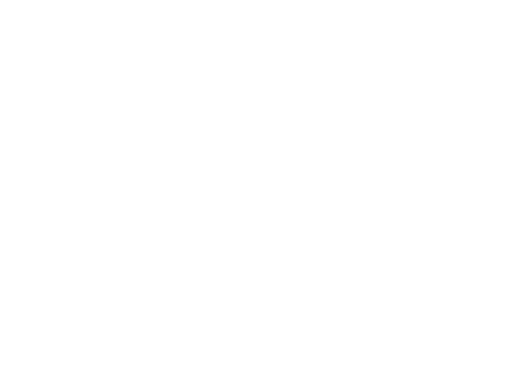

<IPython.core.display.Javascript object>


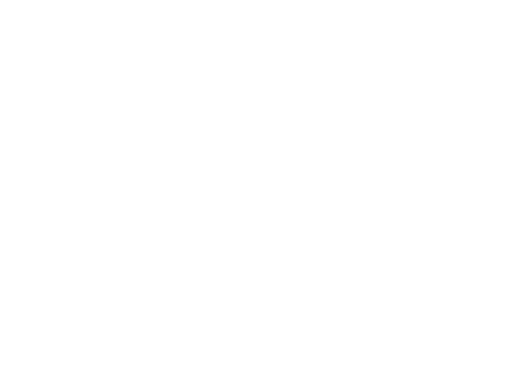

1838283


<IPython.core.display.Javascript object>


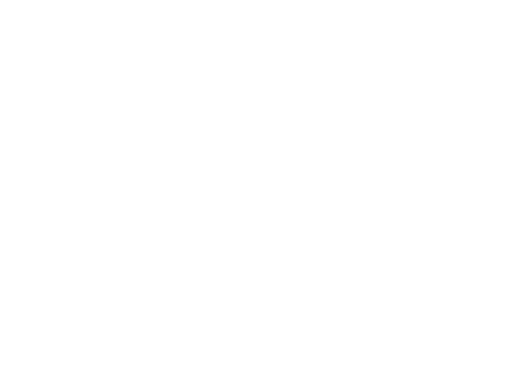

In [6]:
bins = np.linspace(np.min(y_train_log),np.max(y_train_log),50)
hist,bins = np.histogram(y_train_log,bins =bins)
plt.figure()
plt.scatter(bins[1:],hist)
plt.figure()
print(y_train_log.size)
plt.plot(y_train_log.size/(hist+1))
bin_size = bins[1]-bins[0]
y_min = np.min(y_train_log)
sample_weights = np.ones((y_train_log.size))
for i in range(0,y_train_log.size):
    bin_i = int((y_train_log[i]-y_min)/bin_size)
    if bin_i ==49:
        bin_i = 48
    sample_weights[i] = y_train_log.size/(hist[bin_i]+1)
    
plt.figure()
plt.hist(sample_weights,bins=50)
plt.show()

In [7]:
import numpy as np

class DataGenerator_train(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(33), n_channels=1,
                 n_classes=10, shuffle=True, sample_weights=None):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        print(list_IDs)
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()
        self.sample_weights = sample_weights

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y, self.sample_weights[list_IDs_temp]

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, self.dim))
        y = np.zeros((self.batch_size,128,128))

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            X[i,] =XX[ID,:] #np.load('data/' + ID + '.npy')
            for j in range(0,15): # will use moving window for 5 timesteps up to 3 SC_IDs
                if ((ID-7+j > 0) and (ID-7+j)<len(self.list_IDs)):
                    if(abs( (df_train.index[ID]-
                       df_train.index[ID-7+j] ).seconds) <=2*60 ):
                        
                        mlat = df_train['SC_AACGM_LAT'][ID-7+j]
                        mltime = df_train['SC_AACGM_LTIME'][ID-7+j]/24*2*np.pi 
                        mlat_j = int((90-mlat)/45*128)
                        mltime_k = int((mltime)/(2*np.pi)*128)

                        y[i,mlat_j,mltime_k] = y_train_log[ID-7+j]
                        

        return X, y
    

class DataGenerator_test(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(33), n_channels=1,
                 n_classes=10, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        print(list_IDs)
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_temp = [self.list_IDs[k] for k in indexes]

        # Generate data
        X, y = self.__data_generation(list_IDs_temp)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        # Initialization
        X = np.empty((self.batch_size, self.dim))
        y = np.zeros((self.batch_size,128,128))

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            X[i,] =XX_test[ID,:] #np.load('data/' + ID + '.npy')
            mlat = df_val['SC_AACGM_LAT'][ID]
            mltime = df_val['SC_AACGM_LTIME'][ID]/24*2*np.pi 
            mlat_j = int((90-mlat)/45*128)
            mltime_k = int((mltime)/(2*np.pi)*128)
            #print( mlat,   mltime ,mlat_j,  mltime_k )


            y[i,mlat_j,mltime_k] = y_val_log[ID]

        return X, y
 

In [8]:
num_in = 145

# Parameters
params = {'dim': 145,
          'batch_size': 2048,
          'n_classes': 6, # not used
          'n_channels': 1, # not used
          'shuffle': True,
         'sample_weights': sample_weights}

# Datasets
partition ={ 'train': np.linspace(0, df_train.shape[0]-1, df_train.shape[0]).astype(int), 'validation': np.linspace(0, df_val.shape[0]-1, df_val.shape[0]).astype(int)}
labels = { 'train': np.linspace(0, df_train.shape[0]-1, df_train.shape[0]).astype(int), 'validation': np.linspace(0, df_val.shape[0]-1, df_val.shape[0]).astype(int)}

# Generators
training_generator = DataGenerator_train(partition['train'], labels, **params)
params = {'dim': 145,
          'batch_size': 2048,
          'n_classes': 6, # not used
          'n_channels': 1, # not used
          'shuffle': True}
validation_generator = DataGenerator_test(partition['validation'], labels, **params)

def custom_loss(y_true, y_pred):
    
    loss = K.sum(
        K.cast(K.greater(y_true, 0),'float32')*K.square(y_true-y_pred)*
        ( 1. +
         sample_weights[0]*K.cast(K.greater_equal(y_true,bins[0]),'float32')*K.cast(K.less_equal(y_true,bins[1]),'float32') +
sample_weights[1]*K.cast(K.greater_equal(y_true,bins[1]),'float32')*K.cast(K.less_equal(y_true,bins[2]),'float32') +
sample_weights[2]*K.cast(K.greater_equal(y_true,bins[2]),'float32')*K.cast(K.less_equal(y_true,bins[3]),'float32') +
sample_weights[3]*K.cast(K.greater_equal(y_true,bins[3]),'float32')*K.cast(K.less_equal(y_true,bins[4]),'float32') +
sample_weights[4]*K.cast(K.greater_equal(y_true,bins[4]),'float32')*K.cast(K.less_equal(y_true,bins[5]),'float32') +
sample_weights[5]*K.cast(K.greater_equal(y_true,bins[5]),'float32')*K.cast(K.less_equal(y_true,bins[6]),'float32') +
sample_weights[6]*K.cast(K.greater_equal(y_true,bins[6]),'float32')*K.cast(K.less_equal(y_true,bins[7]),'float32') +
sample_weights[7]*K.cast(K.greater_equal(y_true,bins[7]),'float32')*K.cast(K.less_equal(y_true,bins[8]),'float32') +
sample_weights[8]*K.cast(K.greater_equal(y_true,bins[8]),'float32')*K.cast(K.less_equal(y_true,bins[9]),'float32') +
sample_weights[9]*K.cast(K.greater_equal(y_true,bins[9]),'float32')*K.cast(K.less_equal(y_true,bins[10]),'float32') +
sample_weights[10]*K.cast(K.greater_equal(y_true,bins[10]),'float32')*K.cast(K.less_equal(y_true,bins[11]),'float32') +
sample_weights[11]*K.cast(K.greater_equal(y_true,bins[11]),'float32')*K.cast(K.less_equal(y_true,bins[12]),'float32') +
sample_weights[12]*K.cast(K.greater_equal(y_true,bins[12]),'float32')*K.cast(K.less_equal(y_true,bins[12+1]),'float32') +
sample_weights[13]*K.cast(K.greater_equal(y_true,bins[13]),'float32')*K.cast(K.less_equal(y_true,bins[13+1]),'float32') +
sample_weights[14]*K.cast(K.greater_equal(y_true,bins[14]),'float32')*K.cast(K.less_equal(y_true,bins[14+1]),'float32') +
sample_weights[15]*K.cast(K.greater_equal(y_true,bins[15]),'float32')*K.cast(K.less_equal(y_true,bins[15+1]),'float32') +
sample_weights[16]*K.cast(K.greater_equal(y_true,bins[16]),'float32')*K.cast(K.less_equal(y_true,bins[16+1]),'float32') +
sample_weights[17]*K.cast(K.greater_equal(y_true,bins[17]),'float32')*K.cast(K.less_equal(y_true,bins[17+1]),'float32') +
sample_weights[18]*K.cast(K.greater_equal(y_true,bins[18]),'float32')*K.cast(K.less_equal(y_true,bins[18+1]),'float32') +
sample_weights[19]*K.cast(K.greater_equal(y_true,bins[19]),'float32')*K.cast(K.less_equal(y_true,bins[19+1]),'float32') +
sample_weights[20]*K.cast(K.greater_equal(y_true,bins[20]),'float32')*K.cast(K.less_equal(y_true,bins[20+1]),'float32') +
sample_weights[21]*K.cast(K.greater_equal(y_true,bins[21]),'float32')*K.cast(K.less_equal(y_true,bins[21+1]),'float32') +
sample_weights[22]*K.cast(K.greater_equal(y_true,bins[22]),'float32')*K.cast(K.less_equal(y_true,bins[22+1]),'float32') +
sample_weights[23]*K.cast(K.greater_equal(y_true,bins[23]),'float32')*K.cast(K.less_equal(y_true,bins[23+1]),'float32') +
sample_weights[24]*K.cast(K.greater_equal(y_true,bins[24]),'float32')*K.cast(K.less_equal(y_true,bins[24+1]),'float32') +
sample_weights[25]*K.cast(K.greater_equal(y_true,bins[25]),'float32')*K.cast(K.less_equal(y_true,bins[25+1]),'float32') +
sample_weights[26]*K.cast(K.greater_equal(y_true,bins[26]),'float32')*K.cast(K.less_equal(y_true,bins[26+1]),'float32') +
sample_weights[27]*K.cast(K.greater_equal(y_true,bins[27]),'float32')*K.cast(K.less_equal(y_true,bins[27+1]),'float32') +
sample_weights[28]*K.cast(K.greater_equal(y_true,bins[28]),'float32')*K.cast(K.less_equal(y_true,bins[28+1]),'float32') +
sample_weights[29]*K.cast(K.greater_equal(y_true,bins[29]),'float32')*K.cast(K.less_equal(y_true,bins[29+1]),'float32') +
sample_weights[30]*K.cast(K.greater_equal(y_true,bins[30]),'float32')*K.cast(K.less_equal(y_true,bins[30+1]),'float32') +
sample_weights[31]*K.cast(K.greater_equal(y_true,bins[31]),'float32')*K.cast(K.less_equal(y_true,bins[31+1]),'float32') +
sample_weights[32]*K.cast(K.greater_equal(y_true,bins[32]),'float32')*K.cast(K.less_equal(y_true,bins[32+1]),'float32') +
sample_weights[33]*K.cast(K.greater_equal(y_true,bins[33]),'float32')*K.cast(K.less_equal(y_true,bins[33+1]),'float32') +
sample_weights[34]*K.cast(K.greater_equal(y_true,bins[34]),'float32')*K.cast(K.less_equal(y_true,bins[34+1]),'float32') +
sample_weights[35]*K.cast(K.greater_equal(y_true,bins[35]),'float32')*K.cast(K.less_equal(y_true,bins[35+1]),'float32') +
sample_weights[36]*K.cast(K.greater_equal(y_true,bins[36]),'float32')*K.cast(K.less_equal(y_true,bins[36+1]),'float32') +
sample_weights[37]*K.cast(K.greater_equal(y_true,bins[37]),'float32')*K.cast(K.less_equal(y_true,bins[37+1]),'float32') +
sample_weights[38]*K.cast(K.greater_equal(y_true,bins[38]),'float32')*K.cast(K.less_equal(y_true,bins[38+1]),'float32') +
sample_weights[39]*K.cast(K.greater_equal(y_true,bins[39]),'float32')*K.cast(K.less_equal(y_true,bins[39+1]),'float32') +
sample_weights[40]*K.cast(K.greater_equal(y_true,bins[40]),'float32')*K.cast(K.less_equal(y_true,bins[40+1]),'float32') +
sample_weights[41]*K.cast(K.greater_equal(y_true,bins[41]),'float32')*K.cast(K.less_equal(y_true,bins[41+1]),'float32') +
sample_weights[42]*K.cast(K.greater_equal(y_true,bins[42]),'float32')*K.cast(K.less_equal(y_true,bins[42+1]),'float32') +
sample_weights[43]*K.cast(K.greater_equal(y_true,bins[43]),'float32')*K.cast(K.less_equal(y_true,bins[43+1]),'float32') +
sample_weights[44]*K.cast(K.greater_equal(y_true,bins[44]),'float32')*K.cast(K.less_equal(y_true,bins[44+1]),'float32') +
sample_weights[45]*K.cast(K.greater_equal(y_true,bins[45]),'float32')*K.cast(K.less_equal(y_true,bins[45+1]),'float32') +
sample_weights[46]*K.cast(K.greater_equal(y_true,bins[46]),'float32')*K.cast(K.less_equal(y_true,bins[46+1]),'float32') +
sample_weights[47]*K.cast(K.greater_equal(y_true,bins[47]),'float32')*K.cast(K.less_equal(y_true,bins[47+1]),'float32') +
sample_weights[48]*K.cast(K.greater_equal(y_true,bins[48]),'float32')*K.cast(K.less_equal(y_true,bins[48+1]),'float32') 
#+sample_weights[49]*K.cast(K.greater_equal(y_true,bins[49]),'float32')*K.cast(K.less_equal(y_true,bins[49+1]),'float32') 
    ) )  / ( K.sum( K.cast(K.greater(y_true, 0),'float32') ))# finds the number of y_true  > 0
    
    return loss



def custom_mse(y_true, y_pred):
    

    
    mse = K.sum( K.cast(K.greater(y_true, 0),'float32')*(
        K.square(y_true-y_pred)) )/params['batch_size']  
    return mse



[      0       1       2 ... 1838280 1838281 1838282]
[    0     1     2 ... 55207 55208 55209]


In [9]:
input1 = Input(shape=(num_in))

model1 = Dense(256, activation='relu')(input1)
model1 = model1 = Dropout(0.5)(model1)
model1 = Dense(int(64),   activation='relu')(model1)
model1 = Dense(int(32),   activation='relu')(model1)
model1 = Dense(int(256),   activation='relu')(model1)
model1 = tf.keras.layers.Reshape((16, 16, 1))(model1)
# 16x16 to 16 32x32 feature map
model1 = tf.keras.layers.Conv2DTranspose(4, (9,9),
                strides=(2,2), padding='same')(model1)
model1 = tf.keras.layers.Conv2DTranspose(4, (5,5),
                strides=(4,4), padding='same')(model1)
# 4 128x128 feature map to 1 128x128
model1 = model1 = Dropout(0.5)(model1)
model1 = PeriodicPadding2D(3)(model1)
model1 = tf.keras.layers.Conv2D(1, kernel_size=(7,7),
                              padding='valid')(model1)
output = model1

model = tensorflow.keras.models.Model(inputs=input1, outputs=output)
#compile model using accuracy to measure model performance
model.compile(loss=custom_loss, optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.001),metrics=custom_mse)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 145)]             0         
_________________________________________________________________
dense (Dense)                (None, 256)               37376     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               8448      
_________________________________________________________________
reshape (Reshape)            (None, 16, 16, 1)        

In [10]:
history = model.fit(training_generator, 
                    validation_data=validation_generator,
                    batch_size=params['batch_size'],epochs=300,#verbose=2,
                   callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',  restore_best_weights=True,
             patience=60)], use_multiprocessing=True,
                     workers=6)#

Epoch 1/300
  1/897 [..............................] - ETA: 0s - loss: 91839.8516 - custom_mse: 224.9092

ResourceExhaustedError:  OOM when allocating tensor with shape[2048,128,128] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[node custom_loss/Cast_76 (defined at <ipython-input-8-681466bc5757>:77) ]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.
 [Op:__inference_train_function_2438]

Function call stack:
train_function


Process Keras_worker_ForkPoolWorker-6:
Process Keras_worker_ForkPoolWorker-5:
Process Keras_worker_ForkPoolWorker-3:
Process Keras_worker_ForkPoolWorker-2:
Process Keras_worker_ForkPoolWorker-1:
Process Keras_worker_ForkPoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", li

In [ ]:
filename='mse_new_pipeline_145_2D_128x128_periodic_dropout_tailloss_pipline1_distmaybe'
model.save(filename)
model = tensorflow.keras.models.load_model(filename, custom_objects={'custom_loss': custom_loss, 'custom_mse': custom_mse})

history = model.fit(training_generator, 
                    validation_data=validation_generator,
                    batch_size=params['batch_size'],epochs=300,#verbose=2,
                   callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',  restore_best_weights=True,
             patience=60)], use_multiprocessing=True,
                     workers=6)#

In [ ]:
filename='mse_new_pipeline_145_2D_128x128_periodic_dropout_tailloss_pipline1_distmaybe'
model.save(filename)
model = tensorflow.keras.models.load_model(filename, custom_objects={'custom_loss': custom_loss, 'custom_mse': custom_mse})

plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0,.9])
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [ ]:
filename='mse_new_pipeline_145_2D_128x128_periodic_dropout_tailloss_pipline1_distmaybe'
model = tensorflow.keras.models.load_model(filename, custom_objects={'custom_loss': custom_loss, 'custom_mse': custom_mse})


history = model.fit(training_generator, 
                    validation_data=validation_generator,
                    batch_size=params['batch_size'],epochs=300,#verbose=2,
                   callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',  restore_best_weights=True,
             patience=60)], use_multiprocessing=True,
                     workers=6)#

In [ ]:
filename='mse_new_pipeline_145_2D_128x128_periodic_dropout_tailloss_pipline1_distmaybe'
model.save(filename)
model = tensorflow.keras.models.load_model(filename, custom_objects={'custom_loss': custom_loss, 'custom_mse': custom_mse})

plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.ylim([0,.9])
plt.show()

plt.figure()
# summarize history for loss
plt.plot(history.history['loss'][:])
plt.plot(history.history['val_loss'][:])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [ ]:
mark= ['s', 'o', 'D', 'v']

%matplotlib inline
plt.ioff()
range1=np.min(np.min([-df_val['AL'].values,df_val['AE'].values,df_val['AU'].values]))
range2=np.max(np.max([-df_val['AL'].values,df_val['AE'].values,df_val['AU'].values]))
os.system('source /home/jackalak/heartbeat/cdf38_0-dist/bin/definitions.B')
os.environ["CDF_LIB"] = '/home/jackalak/heartbeat/cdf38_0-dist/lib'
from spacepy import pycdf

from ovationpyme.ovation_prime import FluxEstimator,AverageEnergyEstimator,BinCorrector
from ovationpyme.ovation_utilities import calc_avg_solarwind
from ovationpyme.ovation_plotting import latlt2polar,polar2dial,pcolor_flux
max_val = 13
min_val = 7.5
    
for ii in range(0,100):
    results = model.predict( XX_test[0+ii*100:2+ii*100,:])

    fig= plt.figure(figsize=(12,10))
    ax1 = plt.subplot2grid((4,2), (0,0), colspan=2,rowspan=1)
    ax3 = plt.subplot2grid((4,2), (1,0), colspan=2,rowspan=1)
    ax4 = plt.subplot2grid((4,2), (2,0), rowspan=2,colspan=1,polar=True)
    ax5 = plt.subplot2grid((4,2), (2, 1), rowspan=2,colspan=1,polar=True)




    ax1.plot(-df_val['AL'], marker=mark[1],markersize=3)
    ax1.plot(df_val['AE'], marker=mark[2],markersize=3)
    ax1.plot(df_val['AU'], marker=mark[3],markersize=3)
    ax1.plot([df_val.index[ii*100],df_val.index[ii*100]],[range1,range2],'--')

    ax1.legend(['-AL','AE','AU'])
    ax1.set_xlabel('time (month, day, year labels)')
    ax1.set_title('Example Magnetic Indices',fontweight="bold")

    mlatgridN = np.linspace(90,45,num=128)
    mltgridN =  np.linspace(0,24,num=128)   
    flux = 10**(results[0,:,:,0])*1.60218e-12*3.14159


    pcolor_kwargs = {'cmap':'gnuplot','vmin':(10**7.5)*1.60218e-12*3.14159,'vmax':(10**12.5)*1.60218e-12*3.14159}
    mappableN = pcolor_flux(ax5,mlatgridN,mltgridN,flux,'N',**pcolor_kwargs)

    ax5.set_title('Predicted Electron Precipitation Energy Flux (Neural Net)',fontweight="bold", fontsize='medium',pad=10)


    ax5.set_theta_zero_location('S')
    theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
    theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
    ax5.set_thetagrids(theta_label_values,labels=theta_labels)

    r_label_values = 90.-np.array([80.,70.,60.,50.])
    r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
    ax5.set_rgrids(r_label_values,labels=r_labels)
    ax5.set_rlim([0.,45.])


    ###########################3
    # Ovation
    ########################
    dt = y_val_log.index[ii*100]
    print(dt)
    auroral_types = ['diff','mono','wave','ions']
    # axS = f.add_subplot(122,projection='polar')
    for jj in range(0,3):
        atype = auroral_types[jj]
        jtype ="energy"
        bincorrect = True
        combine_hemispheres = True
        dtstr = dt.strftime('%Y%m%d %H:%M')
        if jtype=='average energy':
            estimator = AverageEnergyEstimator(atype)
            get_precip_for_time = estimator.get_eavg_for_time
        else:
            estimator = FluxEstimator(atype,jtype)
            get_precip_for_time = estimator.get_flux_for_time


        tflux_kwargs = {'combine_hemispheres':combine_hemispheres,
                        'return_dF':True}
        fluxtupleN = get_precip_for_time(dt,hemi='N',**tflux_kwargs)
        mlatgridN,mltgridN,fluxgridN,newell_coupling = fluxtupleN
        fluxtupleS = get_precip_for_time(dt,hemi='S',**tflux_kwargs)
        mlatgridS,mltgridS,fluxgridS,newell_coupling = fluxtupleS

        if bincorrect:
            bcN = BinCorrector(mlatgridN,mltgridN)
            fluxgridN = bcN.fix(fluxgridN)
            bcS = BinCorrector(mlatgridS,mltgridS)
            fluxgridS = bcS.fix(fluxgridS)
            print("Correction Applied")

        if jj== 0:
            fluxgridN_sum = fluxgridN
            fluxgridS_sum = fluxgridS
        else:
            fluxgridN_sum = fluxgridN_sum+fluxgridN
            fluxgridS_sum = fluxgridN_sum+fluxgridS

    mappableN = pcolor_flux(ax4,mlatgridN,mltgridN,fluxgridN_sum,'N',**pcolor_kwargs)

    ax4.set_title('Predicted Electron Precipitation Energy Flux (OVATION Pyme)',pad =10,fontweight="bold", fontsize='medium')


    ax4.set_theta_zero_location('S')
    theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
    theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
    ax4.set_thetagrids(theta_label_values,labels=theta_labels,fontsize='medium', )

    r_label_values = 90.-np.array([80.,70.,60.,50.])
    r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
    ax4.set_rgrids(r_label_values,labels=r_labels)
    ax4.set_rlim([0.,45.])
    
    ax4.scatter(np.ones((20))*23/24*2*3.14159 ,                   np.linspace(0,40,20)      )     
    ax5.scatter(np.ones((20))*23/24*2*3.14159 ,                   np.linspace(0,45,20 )     )     

    plt.colorbar(mappableN,ax=ax5,label='Total Energy Flux [erg/cm^s/s]')
    
    ax3.set_title('Log Scale Electron Precipitation Energy Flux [Log10 eV/cm^2/s]'+' '+str(dt),fontweight="bold")
    ax3.scatter(np.linspace(90,50,80),np.log10(fluxgridN_sum[:,int(23/24*96)]/1.60218e-12), marker=mark[2])
    ax3.scatter(np.linspace(90,45,128),np.log10(flux[:,int(23/24*128)]/1.60218e-12), marker=mark[3])
    ax3.legend(['OVATION Pyme model','neural net: 0.5 deg / Mlat'])
    ax3.set_ylim(top=max_val,bottom=min_val)
    fig.tight_layout() 

    
    plt.show()

In [ ]:
mark= ['s', 'o', 'D', 'v']

%matplotlib inline
plt.ioff()
range1=np.min(np.min([-df_val['AL'].values,df_val['AE'].values,df_val['AU'].values]))
range2=np.max(np.max([-df_val['AL'].values,df_val['AE'].values,df_val['AU'].values]))
os.system('source /home/jackalak/heartbeat/cdf38_0-dist/bin/definitions.B')
os.environ["CDF_LIB"] = '/home/jackalak/heartbeat/cdf38_0-dist/lib'
from spacepy import pycdf

from ovationpyme.ovation_prime import FluxEstimator,AverageEnergyEstimator,BinCorrector
from ovationpyme.ovation_utilities import calc_avg_solarwind
from ovationpyme.ovation_plotting import latlt2polar,polar2dial,pcolor_flux
max_val = 13
min_val = 7.5
    
for ii in range(0,100):
    results = model.predict( XX_test[0+ii*100:2+ii*100,:])

    fig= plt.figure(figsize=(12,10))
    ax1 = plt.subplot2grid((4,2), (0,0), colspan=2,rowspan=1)
    ax3 = plt.subplot2grid((4,2), (1,0), colspan=2,rowspan=1)
    ax4 = plt.subplot2grid((4,2), (2,0), rowspan=2,colspan=1,polar=True)
    ax5 = plt.subplot2grid((4,2), (2, 1), rowspan=2,colspan=1,polar=True)




    ax1.plot(-df_val['AL'], marker=mark[1],markersize=3)
    ax1.plot(df_val['AE'], marker=mark[2],markersize=3)
    ax1.plot(df_val['AU'], marker=mark[3],markersize=3)
    ax1.plot([df_val.index[ii*100],df_val.index[ii*100]],[range1,range2],'--')

    ax1.legend(['-AL','AE','AU'])
    ax1.set_xlabel('time (month, day, year labels)')
    ax1.set_title('Example Magnetic Indices',fontweight="bold")

    mlatgridN = np.linspace(90,45,num=128)
    mltgridN =  np.linspace(0,24,num=128)   
    flux = 10**(results[0,:,:,0])*1.60218e-12*3.14159


    pcolor_kwargs = {'cmap':'gnuplot','vmin':7.5,'vmax':12.5}
    mappableN = pcolor_flux(ax5,mlatgridN,mltgridN,np.log10(flux/1.60218e-12),'N',**pcolor_kwargs)

    ax5.set_title('Log10 Predicted Electron Precipitation Energy Flux (Neural Net)',fontweight="bold", fontsize='medium',pad=10)


    ax5.set_theta_zero_location('S')
    theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
    theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
    ax5.set_thetagrids(theta_label_values,labels=theta_labels)

    r_label_values = 90.-np.array([80.,70.,60.,50.])
    r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
    ax5.set_rgrids(r_label_values,labels=r_labels)
    ax5.set_rlim([0.,45.])


    ###########################3
    # Ovation128
    ########################
    dt = y_val_log.index[ii*100]
    print(dt)
    auroral_types = ['diff','mono','wave','ions']
    # axS = f.add_subplot(122,projection='polar')
    for jj in range(0,3):
        atype = auroral_types[jj]
        jtype ="energy"
        bincorrect = True
        combine_hemispheres = True
        dtstr = dt.strftime('%Y%m%d %H:%M')
        if jtype=='average energy':
            estimator = AverageEnergyEstimator(atype)
            get_precip_for_time = estimator.get_eavg_for_time
        else:
            estimator = FluxEstimator(atype,jtype)
            get_precip_for_time = estimator.get_flux_for_time


        tflux_kwargs = {'combine_hemispheres':combine_hemispheres,
                        'return_dF':True}
        fluxtupleN = get_precip_for_time(dt,hemi='N',**tflux_kwargs)
        mlatgridN,mltgridN,fluxgridN,newell_coupling = fluxtupleN
        fluxtupleS = get_precip_for_time(dt,hemi='S',**tflux_kwargs)
        mlatgridS,mltgridS,fluxgridS,newell_coupling = fluxtupleS

        if bincorrect:
            bcN = BinCorrector(mlatgridN,mltgridN)
            fluxgridN = bcN.fix(fluxgridN)
            bcS = BinCorrector(mlatgridS,mltgridS)
            fluxgridS = bcS.fix(fluxgridS)
            print("Correction Applied")

        if jj== 0:
            fluxgridN_sum = fluxgridN
            fluxgridS_sum = fluxgridS
        else:
            fluxgridN_sum = fluxgridN_sum+fluxgridN
            fluxgridS_sum = fluxgridN_sum+fluxgridS

    mappableN = pcolor_flux(ax4,mlatgridN,mltgridN,np.log10(fluxgridN_sum/1.60218e-12),'N',**pcolor_kwargs)

    ax4.set_title('Log10 Predicted Electron Precipitation Energy Flux (OVATION Pyme)',pad =10,fontweight="bold", fontsize='medium')


    ax4.set_theta_zero_location('S')
    theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
    theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
    ax4.set_thetagrids(theta_label_values,labels=theta_labels,fontsize='medium', )

    r_label_values = 90.-np.array([80.,70.,60.,50.])
    r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
    ax4.set_rgrids(r_label_values,labels=r_labels)
    ax4.set_rlim([0.,45.])
    
    ax4.scatter(np.ones((20))*23/24*2*3.14159 ,                   np.linspace(0,40,20)      )     
    ax5.scatter(np.ones((20))*23/24*2*3.14159 ,                   np.linspace(0,45,20 )     )     

    plt.colorbar(mappableN,ax=ax5,label='Total Energy Flux [erg/cm^s/s]')
    
    ax3.set_title('Log Scale Electron Precipitation Energy Flux [Log10 eV/cm^2/s]'+' '+str(dt),fontweight="bold")
    ax3.scatter(np.linspace(90,50,80),np.log10(fluxgridN_sum[:,int(23/24*96)]/1.60218e-12), marker=mark[2])
    ax3.scatter(np.linspace(90,45,128),np.log10(flux[:,int(23/24*128)]/1.60218e-12), marker=mark[3])
    ax3.legend(['OVATION Pyme model','neural net: 0.5 deg / Mlat'])
    ax3.set_ylim(top=max_val,bottom=min_val)
    fig.tight_layout() 

    
    plt.show()

In [ ]:
def plot_hemisphere_CSV_val(scaler_X, model, features, test, XX_test):

    mark= ['s', 'o', 'D', 'v']

    y_val_log = np.log10(test['ELE_TOTAL_ENERGY_FLUX']+.0001)

    num = test.shape[0]
    
    %matplotlib inline
    plt.ioff()
    ovation_val = []
    result_val = []
    
    range1=np.max(np.max([-test['AL'].values,test['AE'].values,test['AU'].values]))
    
    ml_hemi = []
    ovation_hemi = []
    
    for i in range(0,num):


       #################################
        #
        #ML model
        ##########################
        results = model.predict( XX_test[i:i+1,:])
        mlatgridN = np.linspace(90,45,num=128)
        mltgridN =  np.linspace(0,24,num=128)   
        flux = 10**(results[0,:,:,0])*1.60218e-12*3.14159




        ###########################3
        # Ovation
        ########################
        dt = test.index[i]
        auroral_types = ['diff','mono','wave','ions']
        for jj in range(0,3):
            atype = auroral_types[jj]
            jtype ="energy"
            bincorrect = True
            combine_hemispheres = True
            dtstr = dt.strftime('%Y%m%d %H:%M')
            if jtype=='average energy':
                estimator = AverageEnergyEstimator(atype)
                get_precip_for_time = estimator.get_eavg_for_time
            else:
                estimator = FluxEstimator(atype,jtype)
                get_precip_for_time = estimator.get_flux_for_time


            tflux_kwargs = {'combine_hemispheres':combine_hemispheres,
                            'return_dF':True}
            fluxtupleN = get_precip_for_time(dt,hemi='N',**tflux_kwargs)
            mlatgridN,mltgridN,fluxgridN,newell_coupling = fluxtupleN
            fluxtupleS = get_precip_for_time(dt,hemi='S',**tflux_kwargs)
            mlatgridS,mltgridS,fluxgridS,newell_coupling = fluxtupleS

            if bincorrect:
                bcN = BinCorrector(mlatgridN,mltgridN)
                fluxgridN = bcN.fix(fluxgridN)
                bcS = BinCorrector(mlatgridS,mltgridS)
                fluxgridS = bcS.fix(fluxgridS)
                print("Correction Applied")

            if jj== 0:
                fluxgridN_sum = fluxgridN
                fluxgridS_sum = fluxgridS
            else:
                fluxgridN_sum = fluxgridN_sum+fluxgridN
                fluxgridS_sum = fluxgridN_sum+fluxgridS

           
       
        pt = i

        result_val.append( 
            flux[int((90-test['SC_AACGM_LAT'][pt])/45*128),int((test['SC_AACGM_LTIME'][pt])/24*128)] )
        if  test['SC_AACGM_LAT'][pt] <= 50:
            ovation_val.append( fluxgridN_sum[0,int((test['SC_AACGM_LTIME'][pt])/24*96)] )
        else:
            ovation_val.append( 
                fluxgridN_sum[int((90-test['SC_AACGM_LAT'][pt])/40*80),int((test['SC_AACGM_LTIME'][pt])/24*96)] )

       
        ml_hemi.append(flux)
        ovation_hemi.append(fluxgridN_sum)
    
        
    plt.show()
    
    for i in range(0,num):
        
        flux = ml_hemi[i]
        fluxgridN_sum =ovation_hemi[i]

        fig= plt.figure(figsize=(20,12))
        ax3 = plt.subplot2grid((4,4), (0,0), colspan=4,rowspan=1)
        ax1 = plt.subplot2grid((4,4), (1,0), colspan=4,rowspan=1)
        ax4 = plt.subplot2grid((4,4), (2,0), rowspan=2,colspan=2,polar=True)
        ax5 = plt.subplot2grid((4,4), (2, 2), rowspan=2,colspan=2,polar=True)
        
        ax1.plot(-test['AL'], marker=mark[1],markersize=3)
        ax1.plot(test['AE'], marker=mark[2],markersize=3)
        ax1.plot(test['AU'], marker=mark[3],markersize=3)
        ax1.plot([test.index[i],test.index[i]],[0,10000],'--')

        ax1.legend(['-AL','AE','AU'])
        ax1.set_ylim(top=range1)
        ax1.set_xlim(right=test.index[-1])
        ax1.set_xlabel('time (month, day, year labels)')
        ax1.set_title('Example Magnetic Indices',fontweight="bold")

       #################################
        #
        #ML model
        ##########################
        mlatgridN = np.linspace(90,45,num=128)
        mltgridN =  np.linspace(0,24,num=128)  



        pcolor_kwargs = {'cmap':'gnuplot','vmin':(10**0)*1.60218e-12,'vmax':(10**12.5)*1.60218e-12*3.14159}
        mappableN = pcolor_flux(ax5,mlatgridN,mltgridN,flux,'N',**pcolor_kwargs)

        ax5.set_title('Predicted Electron Precipitation Energy Flux (Neural Net)',fontweight="bold", fontsize='medium',pad=10)
        ax5.set_theta_zero_location('S')
        theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
        theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
        ax5.set_thetagrids(theta_label_values,labels=theta_labels)

        r_label_values = 90.-np.array([80.,70.,60.,50.])
        r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
        ax5.set_rgrids(r_label_values,labels=r_labels)
        ax5.set_rlim([0.,45.])


        ###########################3
        # Ovation
        ########################
        dt = test.index[i]
        dtstr = dt.strftime('%Y%m%d %H:%M')
        mlatgridN = np.linspace(90,50,num=80)
        mltgridN = np.linspace(90,45,num=96)

        mappableN = pcolor_flux(ax4,mlatgridN,mltgridN,fluxgridN_sum,'N',**pcolor_kwargs)

        ax4.set_title('Predicted Electron Precipitation Energy Flux (OVATION Pyme)',pad =10,fontweight="bold", fontsize='medium')
        ax4.set_theta_zero_location('S')
        theta_label_values = np.array([0.,3.,6.,9.,12.,15.,18.,21.])*180./12
        theta_labels = ['%d:00' % (int(th/180.*12)) for th in theta_label_values.flatten().tolist()]
        ax4.set_thetagrids(theta_label_values,labels=theta_labels,fontsize='medium', )

        r_label_values = 90.-np.array([80.,70.,60.,50.])
        r_labels = [r'$%d^{o}$' % (int(90.-rv)) for rv in r_label_values.flatten().tolist()]
        ax4.set_rgrids(r_label_values,labels=r_labels)
        ax4.set_rlim([0.,45.])
        plt.colorbar(mappableN,ax=ax5,label='Total Flux [erg/cm^2/s]',fraction=0.05,pad=0.09)
        plt.colorbar(mappableN,ax=ax4,label='Total Flux [erg/cm^2/s]',fraction=0.05,pad=0.09)

           
        ax4.scatter(test['SC_AACGM_LTIME'][i]/24*2*3.14159,90-test['SC_AACGM_LAT'][i])     
        ax5.scatter(test['SC_AACGM_LTIME'][i]/24*2*3.14159,90-test['SC_AACGM_LAT'][i])     
        ax4.tick_params(axis='y', colors='white')
        ax5.tick_params(axis='y', colors='white')


        ax3.set_title('Log Scale Electron Precipitation Energy Flux [Log10 eV/cm^2/s]'+' '+str(dt),fontweight="bold")
        ax3.set_title('Log Scale Electron Precipitation Energy Flux Log10 [eV/cm^2/s]'+' '+str(dt),fontweight="bold")
        ax3.plot(test.index,np.log10(np.array(ovation_val)/1.60218e-12), marker=mark[1])
        ax3.plot(test.index,np.log10(np.array(result_val)/1.60218e-12), marker=mark[2])
        ax3.plot(test.index,np.log10(10**(y_val_log)*3.14159), marker=mark[3])
        ax3.plot([test.index[i],test.index[i]],[7.5,13.5],'--')
        ax3.legend(['OVATION Pyme model','neural net: 0.5 deg / Mlat','measured value','current time'])
        ax3.set_ylim(top=13.5,bottom=7.5)
        ax3.set_xlim(right=test.index[-1])

        fig.tight_layout() 
        name = 'figures/movie_val_'+str(i) + '.png'
        fig.savefig(name,dpi=400)
        
    plt.show()
    
    #os.system('ffmpeg -r:v 5 -i "figures/movie_val_%01d.png" -codec:v libx264 -preset veryslow  "movie_val_2013_SC17.mp4";ffmpeg -i movie_val_2013_SC17.mp4 -c:v libx264 -c:a libmp3lame -b:a 384K movie_val_2013_SC17.avi;')
    return result_val, ovation_val


In [ ]:
features = ['SC_AACGM_LAT', 'ELE_TOTAL_ENERGY_FLUX', 'ID_SC', 'sin_ut',
                             'cos_ut', 'sin_doy', 'cos_doy', 'sin_SC_AACGM_LTIME', 'cos_SC_AACGM_LTIME',
                             'F107', 'AE', 'AL', 'AU', 'SymH', 
                             'F107_6hr', 'AE_6hr', 'AL_6hr', 'AU_6hr', 'SymH_6hr', 'F107_5hr', 'AE_5hr', 'AL_5hr', 'AU_5hr', 'SymH_5hr', 
                             'F107_3hr', 'AE_3hr', 'AL_3hr', 'AU_3hr', 'SymH_3hr', 
                             'F107_1hr', 'AE_1hr', 'AL_1hr', 'AU_1hr', 'SymH_1hr', 
                             ]

result_val, ovation_val = plot_hemisphere_CSV_val(scaler_X, model, features, df_val[0:df_val.shape[0]:600], XX_test[0:df_val.shape[0]:600,:])


In [ ]:
np.average( (y_val_log[0:df_val.shape[0]:600]-np.log10(np.array(result_val)/1.60218e-12/3.14159))**2)


In [ ]:
def for_CSV_val(scaler_X, model, features, test, XX_test):

    mark= ['s', 'o', 'D', 'v']

    y_val_log = np.log10(test['ELE_TOTAL_ENERGY_FLUX']+.0001)

    num = test.shape[0]
    
    %matplotlib inline
    plt.ioff()
    result_val = []

    
    for i in range(0,num):


       #################################
        #
        #ML model
        ##########################
        results = model.predict( XX_test[i:i+1,:])
        mlatgridN = np.linspace(90,45,num=128)
        mltgridN =  np.linspace(0,24,num=128)   
        flux = results[0,:,:,0]




           
       
        pt = i

        result_val.append( 
            flux[int((90-test['SC_AACGM_LAT'][pt])/45*128),int((test['SC_AACGM_LTIME'][pt])/24*128)] )

       
    
        

    return result_val

In [ ]:
result_val = for_CSV_val(scaler_X, model, features, df_val, XX_test)
np.average((y_val_log-(np.array(result_val)))**2)


In [ ]:
plt.figure()
plt.hist(y_val_log,  alpha=0.5, bins=200)
plt.hist( result_val, alpha=0.5, bins=200)
plt.show()

In [ ]:
dpi=200
df_results = pd.DataFrame(data=result_val, index = df_val.index)

plot_model(df_results, df_val)

In [ ]:
df_val